Refered from https://github.com/aditi-govindu/Image-Classsification-using-sklearn

In [1]:
#in case of pillow install instead of PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

<h1>Data Preprocessing</h1>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = 'train'

# Images to be classified as:
Categories = ["lensed","unlensed"]

for i in Categories:
    print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
    # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
    target_class = Categories.index(i)
    # Create data path for all folders under MinorProject
    path = os.path.join(DataDirectory,i)
    # Image resizing, to ensure all images are of same dimensions
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        # Skimage normalizes the value of image
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: lensed 	Label encoded as: 0
Category is: unlensed 	Label encoded as: 1


In [3]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.558023,0.469060,0.428523,0.371503,0.323962,0.288663,0.090418,0.088372,0.060355,0.051291,...,0.039224,0.039224,0.047067,0.039655,0.039655,0.047499,0.039995,0.039995,0.047838,0
1,0.067444,0.036532,0.021054,0.072107,0.037088,0.018695,0.072121,0.031556,0.022330,0.063456,...,0.027577,0.022954,0.015368,0.028850,0.024325,0.016858,0.032603,0.025301,0.016983,0
2,0.087337,0.085174,0.065839,0.082949,0.078817,0.076516,0.084239,0.070101,0.078766,0.091694,...,0.074150,0.080010,0.100307,0.056007,0.052522,0.066185,0.042558,0.054201,0.067827,0
3,0.066205,0.071291,0.058293,0.055410,0.056818,0.057217,0.056090,0.057287,0.049096,0.049397,...,0.063223,0.072103,0.063936,0.053915,0.060715,0.061236,0.050299,0.053951,0.055022,0
4,0.018009,0.021931,0.037617,0.016030,0.019952,0.035638,0.011894,0.015816,0.031640,0.013576,...,0.013141,0.016965,0.032651,0.014697,0.018618,0.034305,0.011605,0.015526,0.031213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.291277,0.281636,0.297850,0.247663,0.300603,0.301198,0.244339,0.291318,0.298528,0.233933,...,0.111890,0.115455,0.145091,0.098744,0.114362,0.134037,0.078672,0.110261,0.124008,1
271,0.087374,0.098560,0.133415,0.122026,0.119902,0.138351,0.103622,0.108269,0.136053,0.134628,...,0.090252,0.092489,0.118773,0.089885,0.094293,0.120741,0.089404,0.090115,0.121170,1
272,0.007304,0.000002,0.003382,0.007540,0.000040,0.003618,0.007462,0.000011,0.003540,0.007802,...,0.115532,0.050288,0.024164,0.110635,0.048333,0.021406,0.108775,0.048741,0.025784,1
273,0.065029,0.064745,0.062732,0.067254,0.071256,0.080861,0.078939,0.076754,0.091539,0.080632,...,0.056381,0.069083,0.084928,0.056543,0.067555,0.091473,0.050495,0.061726,0.092929,1


AxesImage(54,36;334.8x217.44)


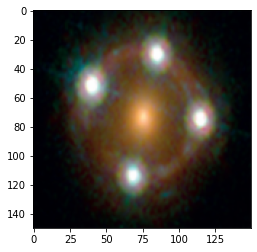

In [4]:
# Display 1 resized image 
print(plt.imshow(images[20]))

<h1>Split data into test-train</h1>

In [5]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (275, 67500)
Output data dimensions: (275,)
Dimensions of input training data: (192, 67500)
Dimensions of input testing data: (83, 67500)
Dimensions of output training data: (192,)
Dimensions of output testing data: (83,)


<h1>Applying SVM</h1>

In [6]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   3.8s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.769 total time=   3.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.763 total time=   3.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.632 total time=   3.2s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.579 total time=   3.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.692 total time=   2.8s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.769 total time=   2.9s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.789 total time=   2.8s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.605 total time=   2.7s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.684 total time=   2.7s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.641 total time=   3.5s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [7]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, gamma=0.0001)


In [8]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

<h1>Accuracy Analysis</h1>

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

# print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test),"%")

Accuracy score: 74.69879518072288 %


In [10]:
print("F1 score: ",f1_score(y_test,y_prediction))
print("F1-micro score: ",f1_score(y_test,y_prediction,average='micro'))
print("F1-macro score: ",f1_score(y_test,y_prediction,average='macro'))
print("F1-weighted score: ",f1_score(y_test,y_prediction,average='weighted'))

print("Recall: ",recall_score(y_test,y_prediction))
print("Precision: ",precision_score(y_test,y_prediction))
confusion_matrix(y_test,y_prediction)

F1 score:  0.7835051546391754
F1-micro score:  0.7469879518072289
F1-macro score:  0.7395786642761094
F1-weighted score:  0.7485756562781831
Recall:  0.76
Precision:  0.8085106382978723


array([[24,  9],
       [12, 38]], dtype=int64)

<h1>Saving Model</h1>

In [11]:
import pickle
# Save SVM model in pickle file
pickle.dump(svm,open("gravitational-lensing-model.p","wb"))

<h1>Testing saved model</h1>

In [12]:
# Read byte from pickle model
test_model = pickle.load(open("gravitational-lensing-model.p","rb"))

Enter url of image to test:  https://cdn.mos.cms.futurecdn.net/nGVgh7Nwid5HFgCgvs6cUJ.jpg


Dimensions of original image are: (811, 1200, 3)
PREDICTED OUTPUT IS: lensed


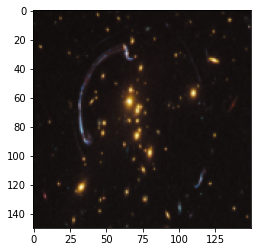

In [13]:
# Testing for a new image
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
# Resize image
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
# URLs to test:
#https://cdn.mos.cms.futurecdn.net/nGVgh7Nwid5HFgCgvs6cUJ.jpg
#https://www.atnf.csiro.au/outreach//education/senior/astrophysics/images/stellarevolution/jewelboxmbsml.jpg
print("PREDICTED OUTPUT IS:",y_output)